# Comparison with CRL2014 models

We select their 0.10, 0.35 and 0.60 Msun models with no atmosphere, solar metallicity and different mixing length parameter:

- \[Fe/H\] = 0, no atm, $\alpha$ = 0.5, 1.0, 1.5, 2.0,

to compare them with my solar metallicity models, with tau100 atm tables and different alphas = 1.0, 1.6, 1.82.

We also compare their 0.10, 0.35 and 0.60 Msun models with atmosphere, alpha = 1.0 and different metallicities:

- Atmosphere, alpha = 1.0 and \[Fe/H\] = 0, -0.5 and -1.0

to compare them with my alpha=1.0 models with tau100 atm tables and different metallicities \[Fe/H\] = -0.5, 0

In [1]:
import mesa_reader as mr
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D  

%matplotlib ipympl

## Reading CRL2014 models

In [2]:
# Define the file paths and read the data
file_paths = [
    ('CRL2014_tracks/feh0_alpha0.5/0p10oe_0p0_0p5_stru.txt', 'df_mass010_feh0_alpha0p5'),
    ('CRL2014_tracks/feh0_alpha0.5/0p35oe_0p0_0p5_stru.txt', 'df_mass035_feh0_alpha0p5'),
    ('CRL2014_tracks/feh0_alpha0.5/0p60oe_0p0_0p5_stru.txt', 'df_mass060_feh0_alpha0p5'),
    ('CRL2014_tracks/feh0_alpha1.0/0p10oe_0p0_1p0_stru.txt', 'df_mass010_feh0_alpha1p0'),
    ('CRL2014_tracks/feh0_alpha1.0/0p35oe_0p0_1p0_stru.txt', 'df_mass035_feh0_alpha1p0'),
    ('CRL2014_tracks/feh0_alpha1.0/0p60oe_0p0_1p0_stru.txt', 'df_mass060_feh0_alpha1p0'),
    ('CRL2014_tracks/feh0_alpha1.5/0p10oe_0p0_1p5_stru.txt', 'df_mass010_feh0_alpha1p5'),
    ('CRL2014_tracks/feh0_alpha1.5/0p35oe_0p0_1p5_stru.txt', 'df_mass035_feh0_alpha1p5'),
    ('CRL2014_tracks/feh0_alpha1.5/0p60oe_0p0_1p5_stru.txt', 'df_mass060_feh0_alpha1p5'),
    ('CRL2014_tracks/feh0_alpha2.0/0p10oe_0p0_2p0_stru.txt', 'df_mass010_feh0_alpha2p0'),
    ('CRL2014_tracks/feh0_alpha2.0/0p35oe_0p0_2p0_stru.txt', 'df_mass035_feh0_alpha2p0'),
    ('CRL2014_tracks/feh0_alpha2.0/0p60oe_0p0_2p0_stru.txt', 'df_mass060_feh0_alpha2p0'),
    ('CRL2014_tracks/atm_feh0_alpha1.0/0p10oa2_0p0_1p0_stru.txt', 'df_mass010_atm_feh0_alpha1p0'),
    ('CRL2014_tracks/atm_feh0_alpha1.0/0p35oa2_0p0_1p0_stru.txt', 'df_mass035_atm_feh0_alpha1p0'),
    ('CRL2014_tracks/atm_feh0_alpha1.0/0p60oa2_0p0_1p0_stru.txt', 'df_mass060_atm_feh0_alpha1p0'),
    ('CRL2014_tracks/atm_feh-0.5_alpha1.0/0p10oa2_m0p5_1p0_stru.txt', 'df_mass010_atm_fehm0p5_alpha1p0'),
    ('CRL2014_tracks/atm_feh-0.5_alpha1.0/0p35oa2_m0p5_1p0_stru.txt', 'df_mass035_atm_fehm0p5_alpha1p0'),
    ('CRL2014_tracks/atm_feh-0.5_alpha1.0/0p60oa2_m0p5_1p0_stru.txt', 'df_mass060_atm_fehm0p5_alpha1p0'),
    ('CRL2014_tracks/atm_feh-1.0_alpha1.0/0p10oa2_m1p0_1p0_stru.txt', 'df_mass010_atm_fehm1p0_alpha1p0'),
    ('CRL2014_tracks/atm_feh-1.0_alpha1.0/0p35oa2_m1p0_1p0_stru.txt', 'df_mass035_atm_fehm1p0_alpha1p0'),
    ('CRL2014_tracks/atm_feh-1.0_alpha1.0/0p60oa2_m1p0_1p0_stru.txt', 'df_mass060_atm_fehm1p0_alpha1p0'),
]

# Define the columns to extract
columns_to_extract = [2, 9, 11, 25] 

# Define the new column names
new_column_names = ['age', 'logTeff', 'mass', 'logg']

# Define the masses to filter by
masses = [0.10, 0.35, 0.60]

# Create a dictionary to store the cleaned and filtered dataframes
cleaned_and_filtered_dfs = {}

# Read each file, extract the columns, rename them, and filter by mass
for file_path, df_name in file_paths:
    df = pd.read_csv(file_path, delim_whitespace=True, header=None)
    extracted_df = df.iloc[:, columns_to_extract]
    extracted_df.columns = new_column_names
    for mass in masses:
        filtered_df = extracted_df[extracted_df['mass'] == mass]
        cleaned_and_filtered_dfs[f'{df_name}_mass{mass:.2f}'] = filtered_df

# Example of accessing a filtered dataframe
mass010_feh0_alpha0p5 = cleaned_and_filtered_dfs['df_mass010_feh0_alpha0p5_mass0.10']
mass010_feh0_alpha0p5

,age,logTeff,mass,logg
0,0.000000e+00,3.42252,0.1,3.0274
1,1.000000e+02,3.42253,0.1,3.0275
2,2.000000e+02,3.42254,0.1,3.0276
3,3.000000e+02,3.42254,0.1,3.0277
4,3.833333e+02,3.42255,0.1,3.0278
...,...,...,...,...
229,3.402866e+08,3.46444,0.1,5.1994
230,3.620564e+08,3.46242,0.1,5.2087
231,3.804730e+08,3.46121,0.1,5.2154
232,4.025728e+08,3.45990,0.1,5.2223


In [3]:
mass010_feh0_alpha0p5 = cleaned_and_filtered_dfs['df_mass010_feh0_alpha0p5_mass0.10']
mass035_feh0_alpha0p5 = cleaned_and_filtered_dfs['df_mass035_feh0_alpha0p5_mass0.35']
mass060_feh0_alpha0p5 = cleaned_and_filtered_dfs['df_mass060_feh0_alpha0p5_mass0.60']

mass010_feh0_alpha1p0 = cleaned_and_filtered_dfs['df_mass010_feh0_alpha1p0_mass0.10']
mass035_feh0_alpha1p0 = cleaned_and_filtered_dfs['df_mass035_feh0_alpha1p0_mass0.35']
mass060_feh0_alpha1p0 = cleaned_and_filtered_dfs['df_mass060_feh0_alpha1p0_mass0.60']

mass010_feh0_alpha1p5 = cleaned_and_filtered_dfs['df_mass010_feh0_alpha1p5_mass0.10']
mass035_feh0_alpha1p5 = cleaned_and_filtered_dfs['df_mass035_feh0_alpha1p5_mass0.35']
mass060_feh0_alpha1p5 = cleaned_and_filtered_dfs['df_mass060_feh0_alpha1p5_mass0.60']

mass010_feh0_alpha2p0 = cleaned_and_filtered_dfs['df_mass010_feh0_alpha2p0_mass0.10']
mass035_feh0_alpha2p0 = cleaned_and_filtered_dfs['df_mass035_feh0_alpha2p0_mass0.35']
mass060_feh0_alpha2p0 = cleaned_and_filtered_dfs['df_mass060_feh0_alpha2p0_mass0.60']

mass010_atm_feh0_alpha1p0 = cleaned_and_filtered_dfs['df_mass010_atm_feh0_alpha1p0_mass0.10']
mass035_atm_feh0_alpha1p0 = cleaned_and_filtered_dfs['df_mass035_atm_feh0_alpha1p0_mass0.35']
mass060_atm_feh0_alpha1p0 = cleaned_and_filtered_dfs['df_mass060_atm_feh0_alpha1p0_mass0.60']

mass010_atm_fehm0p5_alpha1p0 = cleaned_and_filtered_dfs['df_mass010_atm_fehm0p5_alpha1p0_mass0.10']
mass035_atm_fehm0p5_alpha1p0 = cleaned_and_filtered_dfs['df_mass035_atm_fehm0p5_alpha1p0_mass0.35']
mass060_atm_fehm0p5_alpha1p0 = cleaned_and_filtered_dfs['df_mass060_atm_fehm0p5_alpha1p0_mass0.60']

mass010_atm_fehm1p0_alpha1p0 = cleaned_and_filtered_dfs['df_mass010_atm_fehm1p0_alpha1p0_mass0.10']
mass035_atm_fehm1p0_alpha1p0 = cleaned_and_filtered_dfs['df_mass035_atm_fehm1p0_alpha1p0_mass0.35']
mass060_atm_fehm1p0_alpha1p0 = cleaned_and_filtered_dfs['df_mass060_atm_fehm1p0_alpha1p0_mass0.60']


In [4]:
mass010_atm_feh0_alpha1p0

,age,logTeff,mass,logg
0,0.000000e+00,3.51699,0.1,2.4257
1,1.000000e+02,3.51690,0.1,2.4279
2,2.000000e+02,3.51682,0.1,2.4300
3,3.000000e+02,3.51673,0.1,2.4322
4,3.937500e+02,3.51665,0.1,2.4342
...,...,...,...,...
195,5.001313e+08,3.44397,0.1,5.2272
196,5.254083e+08,3.44318,0.1,5.2309
197,5.355191e+08,3.44289,0.1,5.2322
198,5.476520e+08,3.44249,0.1,5.2338


## Reading my models

In [5]:
# Define the parameters
masses = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
alphas = [1.0, 1.6, 1.82]
metallicities = [0.00142, 0.0045, 0.0142]


# Base path template
base_path = 'test2_grid_deuterium_tau100/results/mass{mass}_alpha{alpha}_z{z}/history.data'

# Create a list to store the MesaData instances and their associated alpha values
mesa_data_list = []

# Loop over the parameters to create the paths and MesaData instances
for mass in masses:
    for alpha in alphas:
        for z in metallicities:
            # Format the path
            path = base_path.format(mass=mass, alpha=alpha, z=z)
            
            try:
                # Create the MesaData instance
                mesa_data_instance = mr.MesaData(path)
                
                # Append the MesaData instance to the list
                mesa_data_list.append((mesa_data_instance, mass, z, alpha))
                
            except FileNotFoundError:
                print(f"FileNotFoundError: history.data not found for mass={mass}, alpha={alpha}, z={z}.")

## 0.10$M_\odot$

In [6]:
for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.82:   
        mass010_z0045_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.82:
        mass010_z0142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.00142 and mesa_data[3] == 1.82:
        mass010_z00142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.6:   
        mass010_z0045_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.6:
        mass010_z0142_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.00142 and mesa_data[3] == 1.6:
        mass010_z00142_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.0:   
        mass010_z0045_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.0:
        mass010_z0142_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.00142 and mesa_data[3] == 1.0:
        mass010_z00142_alpha1 = mesa_data[0]
        break

## 0.35$M_\odot$

In [7]:
for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.82:   
        mass035_z0045_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.82:
        mass035_z0142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.00142 and mesa_data[3] == 1.82:
        mass035_z00142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.6:   
        mass035_z0045_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.6:
        mass035_z0142_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.00142 and mesa_data[3] == 1.6:
        mass035_z00142_alpha16 = mesa_data[0]
        break
        
for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.0:   
        mass035_z0045_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.0:
        mass035_z0142_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.00142 and mesa_data[3] == 1.0:
        mass035_z00142_alpha1 = mesa_data[0]
        break
        

## 0.60$M_\odot$

In [8]:
for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.82:  
        mass060_z0045_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.82:
        mass060_z0142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.00142 and mesa_data[3] == 1.82:
        mass060_z00142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.6:  
        mass060_z0045_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.6:
        mass060_z0142_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.00142 and mesa_data[3] == 1.6:
        mass060_z00142_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.0:  
        mass060_z0045_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.0:
        mass060_z0142_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.00142 and mesa_data[3] == 1.0:
        mass060_z00142_alpha1 = mesa_data[0]
        break

## $\alpha_\text{MLT}$ comparison
To compare mixing lengths we select the solar metallicity and no atmosphere models from CRL14 and compare with our models.

Remember that our models have $\alpha$ = 1.0, 1.6, 1.82

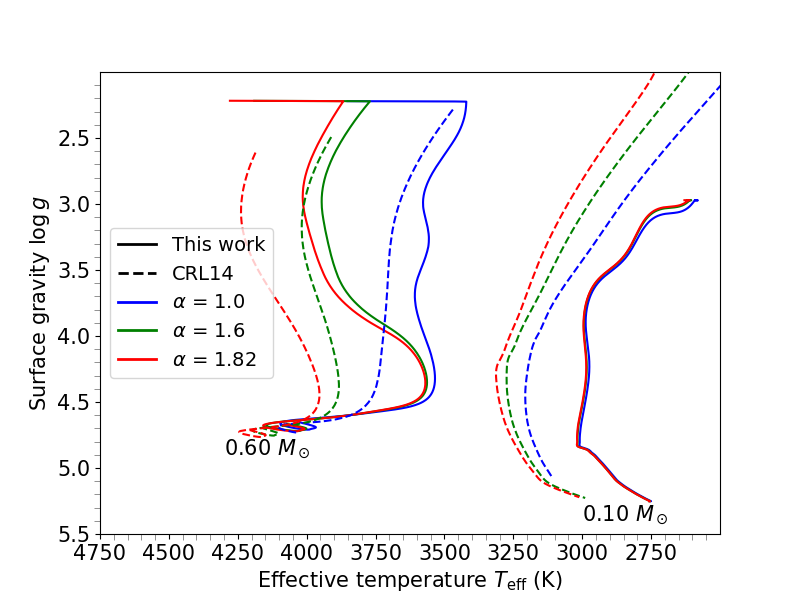

In [9]:
plt.figure(figsize=(8, 6))

plt.annotate(r'0.10 $M_\odot$', (3000, 5.4), fontsize=15)

plt.plot(mass010_z0142_alpha1.Teff, mass010_z0142_alpha1.log_g, color='blue', linestyle='-')
plt.plot(mass010_z0142_alpha16.Teff, mass010_z0142_alpha16.log_g, color='green', linestyle='-')
plt.plot(mass010_z0142_alpha182.Teff, mass010_z0142_alpha182.log_g, color='red', linestyle='-')

# plt.plot(10**(mass010_feh0_alpha0p5['logTeff']), mass010_feh0_alpha0p5['logg'], color='orange', ls='--')
plt.plot(10**(mass010_feh0_alpha1p0['logTeff']), mass010_feh0_alpha1p0['logg'], color='blue', ls='--')
plt.plot(10**(mass010_feh0_alpha1p5['logTeff']), mass010_feh0_alpha1p5['logg'], color='green', ls='--')
plt.plot(10**(mass010_feh0_alpha2p0['logTeff']), mass010_feh0_alpha2p0['logg'], color='red', ls='--')

plt.annotate(r'0.60 $M_\odot$', (4300, 4.9), fontsize=15)

plt.plot(mass060_z0142_alpha1.Teff, mass060_z0142_alpha1.log_g, color='blue', linestyle='-')
plt.plot(mass060_z0142_alpha16.Teff, mass060_z0142_alpha16.log_g, color='green', linestyle='-')
plt.plot(mass060_z0142_alpha182.Teff, mass060_z0142_alpha182.log_g, color='red', linestyle='-')

# plt.plot(10**(mass060_feh0_alpha0p5['logTeff']), mass060_feh0_alpha0p5['logg'], color='orange', ls='--')
plt.plot(10**(mass060_feh0_alpha1p0['logTeff']), mass060_feh0_alpha1p0['logg'], color='blue', ls='--')
plt.plot(10**(mass060_feh0_alpha1p5['logTeff']), mass060_feh0_alpha1p5['logg'], color='green', ls='--')
plt.plot(10**(mass060_feh0_alpha2p0['logTeff']), mass060_feh0_alpha2p0['logg'], color='red', ls='--')


# Set axis labels
plt.xlabel(r'Effective temperature $T_{\text{eff}}$ (K)', fontsize=15)
plt.ylabel(r'Surface gravity $\log g$', fontsize=15)

plt.title(r'')

# Retrieve current axis
ax = plt.gca()

# Set major and minor ticks
xmajor_ticks = np.arange(4750, 2500, -250)
xminor_ticks = np.arange(4750, 2500, -50)
ymajor_ticks = np.arange(5.5, 2, -0.5)
yminor_ticks = np.arange(5.5, 2, -0.1)

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

# Customize tick appearance
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', length=4, color='gray')

# Invert axes
ax.invert_xaxis()
ax.invert_yaxis()

plt.ylim(5.5,2)
plt.xlim(4750,2500)

# Enable grid for minor ticks
#ax.grid(which='both', linestyle='--', linewidth=0.5)
#ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.7)

# Create a custom legend
legend_elements = [
    Line2D([0], [0], color='black', lw=2, linestyle='-', label=r'This work'),
    Line2D([0], [0], color='black', lw=2, linestyle='--', label=r'CRL14'),
    # Line2D([0], [0], color='orange', lw=2, label=r'$\alpha$ = 0.5'),
    Line2D([0], [0], color='blue', lw=2, label=r'$\alpha$ = 1.0'),
    Line2D([0], [0], color='green', lw=2, label=r'$\alpha$ = 1.6'),
    Line2D([0], [0], color='red', lw=2, label=r'$\alpha$ = 1.82'),
]
plt.legend(handles=legend_elements, fontsize=14, loc='best')
# Save figure
plt.savefig('alpha-comparison-CRL14.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


## Metallicity comparison
To compare metallicities we select our models with $\alpha$=1.0 and different metallicities and compare them with models with atm and $\alpha$=1.0 with \[Fe/H\]= -1.0, -0.5, 0

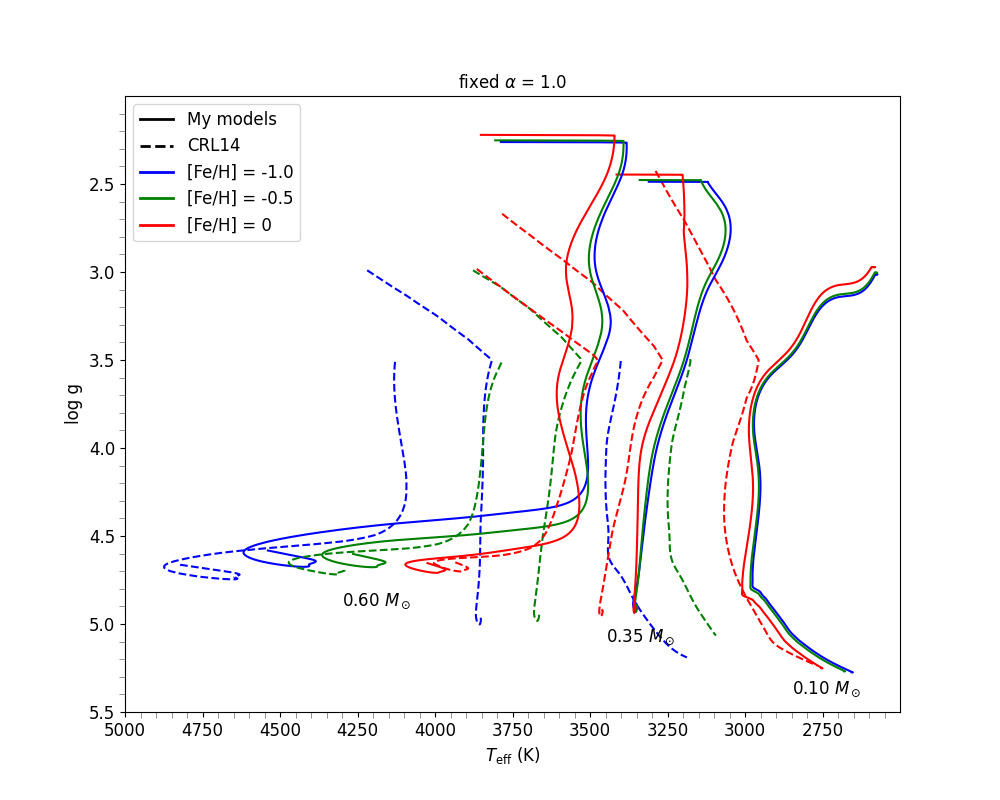

In [10]:
plt.figure(figsize=(10, 8))

plt.annotate(r'0.10 $M_\odot$', (2850, 5.4), fontsize=12)

plt.plot(mass010_z00142_alpha1.Teff, mass010_z00142_alpha1.log_g, color='blue', linestyle='-')
plt.plot(mass010_z0045_alpha1.Teff, mass010_z0045_alpha1.log_g, color='green', linestyle='-')
plt.plot(mass010_z0142_alpha1.Teff, mass010_z0142_alpha1.log_g, color='red', linestyle='-')

plt.plot(10**(mass010_atm_feh0_alpha1p0['logTeff']), mass010_atm_feh0_alpha1p0['logg'], color='red', ls='--')
plt.plot(10**(mass010_atm_fehm0p5_alpha1p0['logTeff']), mass010_atm_fehm0p5_alpha1p0['logg'], color='green', ls='--')
plt.plot(10**(mass010_atm_fehm1p0_alpha1p0['logTeff']), mass010_atm_fehm1p0_alpha1p0['logg'], color='blue', ls='--')

plt.annotate(r'0.35 $M_\odot$', (3450, 5.1), fontsize=12)

plt.plot(mass035_z00142_alpha1.Teff, mass035_z00142_alpha1.log_g, color='blue', linestyle='-')
plt.plot(mass035_z0045_alpha1.Teff, mass035_z0045_alpha1.log_g, color='green', linestyle='-')
plt.plot(mass035_z0142_alpha1.Teff, mass035_z0142_alpha1.log_g, color='red', linestyle='-')

plt.plot(10**(mass035_atm_feh0_alpha1p0['logTeff']), mass035_atm_feh0_alpha1p0['logg'], color='red', ls='--')
plt.plot(10**(mass035_atm_fehm0p5_alpha1p0['logTeff']), mass035_atm_fehm0p5_alpha1p0['logg'], color='green', ls='--')
plt.plot(10**(mass035_atm_fehm1p0_alpha1p0['logTeff']), mass035_atm_fehm1p0_alpha1p0['logg'], color='blue', ls='--')

plt.annotate(r'0.60 $M_\odot$', (4300, 4.9), fontsize=12)

plt.plot(mass060_z00142_alpha1.Teff, mass060_z00142_alpha1.log_g, color='blue', linestyle='-')
plt.plot(mass060_z0045_alpha1.Teff, mass060_z0045_alpha1.log_g, color='green', linestyle='-')
plt.plot(mass060_z0142_alpha1.Teff, mass060_z0142_alpha1.log_g, color='red', linestyle='-')

plt.plot(10**(mass060_atm_feh0_alpha1p0['logTeff']), mass060_atm_feh0_alpha1p0['logg'], color='red', ls='--')
plt.plot(10**(mass060_atm_fehm0p5_alpha1p0['logTeff']), mass060_atm_fehm0p5_alpha1p0['logg'], color='green', ls='--')
plt.plot(10**(mass060_atm_fehm1p0_alpha1p0['logTeff']), mass060_atm_fehm1p0_alpha1p0['logg'], color='blue', ls='--')


# Set axis labels
plt.xlabel(r'$T_{\text{eff}}$ (K)', fontsize=12)
plt.ylabel('log g', fontsize=12)

plt.title(r'fixed $\alpha$ = 1.0')

# Retrieve current axis
ax = plt.gca()

# Set major and minor ticks
xmajor_ticks = np.arange(5000, 2500, -250)
xminor_ticks = np.arange(5000, 2500, -50)
ymajor_ticks = np.arange(5.5, 2, -0.5)
yminor_ticks = np.arange(5.5, 2, -0.1)

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

# Customize tick appearance
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', length=4, color='gray')

# Invert axes
ax.invert_xaxis()
ax.invert_yaxis()

plt.ylim(5.5,2)
plt.xlim(5000,2500)

# Enable grid for minor ticks
#ax.grid(which='both', linestyle='--', linewidth=0.5)
#ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.7)

# Create a custom legend
legend_elements = [
    Line2D([0], [0], color='black', lw=2, linestyle='-', label=r'My models'),
    Line2D([0], [0], color='black', lw=2, linestyle='--', label=r'CRL14'),
    Line2D([0], [0], color='blue', lw=2, label=r'[Fe/H] = -1.0'),
    Line2D([0], [0], color='green', lw=2, label=r'[Fe/H] = -0.5'),
    Line2D([0], [0], color='red', lw=2, label=r'[Fe/H] = 0'),
]
plt.legend(handles=legend_elements, fontsize=12, loc='upper left')
# Save figure
plt.savefig('metallicity-comparison-CRL14.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


# Isochrones
Following what Cristina does in her paper, we compute the 5000Myr isochrones for our models and overplot them with hers

## My isochrones

In [11]:
from scipy.interpolate import interp1d

masses = [0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
alphas = [1.0, 1.6, 1.82]
metallicities = [0.0142]

# Create a list to store the MesaData instances and their associated parameters
mesa_data_list = []

# Loop over the parameters to create the paths and MesaData instances
for mass in masses:
    for alpha in alphas:
        for z in metallicities:
            # Format the path
            path = base_path.format(mass=mass, alpha=alpha, z=z)
            
            try:
                # Create the MesaData instance
                mesa_data_instance = mr.MesaData(path)
                
                # Append the MesaData instance and parameters to the list
                mesa_data_list.append((mesa_data_instance, mass, alpha, z))
                
            except FileNotFoundError:
                print(f"FileNotFoundError: history.data not found for mass={mass}, alpha={alpha}, z={z}.")

# Define the target age (in years)
target_age = 5 * 10**9

# Create dictionaries to store the Teff and radius values at the target age for each combination of alpha and metallicity
my_teff_at_target_age = {(alpha, z): [] for alpha in alphas for z in metallicities}

# Iterate over MesaData instances in mesa_data_list
for mesa_data, mass, alpha, z in mesa_data_list:
    # Extract the age, Teff, and radius arrays
    age = np.array(mesa_data.star_age)
    teff = np.array(mesa_data.Teff)

    # Check if the target age is within the age range of the data
    if target_age >= age[0] and target_age <= age[-1]:
        # Interpolate the Teff and radius values at the target age
        teff_interp = interp1d(age, teff, kind='linear')
        
        teff_at_age = teff_interp(target_age)
        
        # Append the interpolated Teff and radius values to the corresponding lists in the dictionaries
        my_teff_at_target_age[(alpha, z)].append(teff_at_age)
    else:
        print(f"Target age {target_age} years is out of range for mass={mass}, alpha={alpha}, z={z}.")

# Print the results for Teff at the target age
print("Teff values at target age:")
for (alpha, z), teff_list in my_teff_at_target_age.items():
    print(f"Alpha: {alpha}, Z: {z}")
    print(f"Teff values at {target_age} years: {teff_list}")
    print()


Teff values at target age:
Alpha: 1.0, Z: 0.0142
Teff values at 5000000000 years: [array(3170.83390502), array(3277.26202396), array(3312.98416714), array(3334.61879604), array(3353.71174105), array(3386.32614512), array(3449.73043149), array(3583.16073933), array(3805.83828318), array(3979.93718077)]

Alpha: 1.6, Z: 0.0142
Teff values at 5000000000 years: [array(3174.92380981), array(3281.11681437), array(3315.59300798), array(3337.04859722), array(3356.26377657), array(3389.63203872), array(3456.06187498), array(3602.13737188), array(3832.85304504), array(4017.51587567)]

Alpha: 1.82, Z: 0.0142
Teff values at 5000000000 years: [array(3175.70422246), array(3281.810993), array(3316.06820129), array(3337.47192669), array(3356.73373811), array(3390.2481759), array(3457.26219247), array(3605.8367509), array(3837.8377565), array(4025.03936108)]



In [12]:
# Acess to the lists directly

my_teff_at_target_age_alpha1_z00142 = my_teff_at_target_age[(1.0, 0.0142)]
my_teff_at_target_age_alpha16_z00142 = my_teff_at_target_age[(1.6, 0.0142)]
my_teff_at_target_age_alpha182_z00142 = my_teff_at_target_age[(1.82, 0.0142)]

## CRL2014 isochrones

In [26]:
# Define the masses and alpha values
masses = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60]
alphas = [0.5, 1.0, 1.5, 2.0]
feh = 'feh0'

# List where file paths and dataframe names will be stored
file_paths = []

# Iterate over alpha values
for alpha in alphas:
    # Iterate over masses
    for mass in masses:
        # Format the mass value (replace '.' with 'p')
        mass_str = f"{mass:.2f}".replace('.', 'p')
        
        # For the filename, alpha uses 'p' instead of '.'
        alpha_str_for_file = f"{alpha:.1f}".replace('.', 'p')
        
        # For the directory name, alpha uses '.'
        alpha_str_for_dir = f"{alpha:.1f}"
        
        # Create the filename and dataframe name
        file_path = f"CRL2014_tracks/{feh}_alpha{alpha_str_for_dir}/{mass_str}oe_0p0_{alpha_str_for_file}_stru.txt"
        df_name = f"df_mass{mass_str}_feh0_alpha{alpha_str_for_file}"
        
        # Add the tuple (file path, dataframe name) to the list
        file_paths.append((file_path, df_name))

# Print the generated paths for verification
for path in file_paths:
    print(path)

# Define the columns to extract
columns_to_extract = [2, 9, 11]  # Adjusting the index starting from 0

# Define the new column names
new_column_names = ['age', 'logTeff', 'mass']

# Create a dictionary to store the cleaned and filtered dataframes
cleaned_and_filtered_dfs = {}

# Read each file, extract the columns, rename them, and filter by mass
for file_path, df_name in file_paths:
    try:
        df = pd.read_csv(file_path, delim_whitespace=True, header=None)
        extracted_df = df.iloc[:, columns_to_extract]
        extracted_df.columns = new_column_names
        for mass in masses:
            filtered_df = extracted_df[extracted_df['mass'] == mass]
            cleaned_and_filtered_dfs[f'{df_name}_mass{mass:.2f}'] = filtered_df
    except FileNotFoundError:
        print(f"File not found: {file_path}")


('CRL2014_tracks/feh0_alpha0.5/0p10oe_0p0_0p5_stru.txt', 'df_mass0p10_feh0_alpha0p5')
('CRL2014_tracks/feh0_alpha0.5/0p15oe_0p0_0p5_stru.txt', 'df_mass0p15_feh0_alpha0p5')
('CRL2014_tracks/feh0_alpha0.5/0p20oe_0p0_0p5_stru.txt', 'df_mass0p20_feh0_alpha0p5')
('CRL2014_tracks/feh0_alpha0.5/0p25oe_0p0_0p5_stru.txt', 'df_mass0p25_feh0_alpha0p5')
('CRL2014_tracks/feh0_alpha0.5/0p30oe_0p0_0p5_stru.txt', 'df_mass0p30_feh0_alpha0p5')
('CRL2014_tracks/feh0_alpha0.5/0p35oe_0p0_0p5_stru.txt', 'df_mass0p35_feh0_alpha0p5')
('CRL2014_tracks/feh0_alpha0.5/0p40oe_0p0_0p5_stru.txt', 'df_mass0p40_feh0_alpha0p5')
('CRL2014_tracks/feh0_alpha0.5/0p45oe_0p0_0p5_stru.txt', 'df_mass0p45_feh0_alpha0p5')
('CRL2014_tracks/feh0_alpha0.5/0p50oe_0p0_0p5_stru.txt', 'df_mass0p50_feh0_alpha0p5')
('CRL2014_tracks/feh0_alpha0.5/0p55oe_0p0_0p5_stru.txt', 'df_mass0p55_feh0_alpha0p5')
('CRL2014_tracks/feh0_alpha0.5/0p60oe_0p0_0p5_stru.txt', 'df_mass0p60_feh0_alpha0p5')
('CRL2014_tracks/feh0_alpha1.0/0p10oe_0p0_1p0_stru.txt

In [27]:
# Example of accessing a filtered dataframe
mass010_feh0_alpha1p0 = cleaned_and_filtered_dfs['df_mass0p10_feh0_alpha1p0_mass0.10']
mass010_feh0_alpha1p0

,age,logTeff,mass
0,0.000000e+00,3.36099,0.1
1,1.000000e+02,3.36156,0.1
2,2.000000e+02,3.36214,0.1
3,3.000000e+02,3.36270,0.1
4,3.937500e+02,3.36321,0.1
...,...,...,...
250,1.308393e+08,3.49451,0.1
251,1.377245e+08,3.49396,0.1
252,1.449668e+08,3.49340,0.1
253,1.525330e+08,3.49284,0.1


In [15]:
mass010_feh0_alpha0p5 = cleaned_and_filtered_dfs['df_mass0p10_feh0_alpha0p5_mass0.10']
mass015_feh0_alpha0p5 = cleaned_and_filtered_dfs['df_mass0p15_feh0_alpha0p5_mass0.15']
mass020_feh0_alpha0p5 = cleaned_and_filtered_dfs['df_mass0p20_feh0_alpha0p5_mass0.20']
mass025_feh0_alpha0p5 = cleaned_and_filtered_dfs['df_mass0p25_feh0_alpha0p5_mass0.25']
mass030_feh0_alpha0p5 = cleaned_and_filtered_dfs['df_mass0p30_feh0_alpha0p5_mass0.30']
mass035_feh0_alpha0p5 = cleaned_and_filtered_dfs['df_mass0p35_feh0_alpha0p5_mass0.35']
mass040_feh0_alpha0p5 = cleaned_and_filtered_dfs['df_mass0p40_feh0_alpha0p5_mass0.40']
mass045_feh0_alpha0p5 = cleaned_and_filtered_dfs['df_mass0p45_feh0_alpha0p5_mass0.45']
mass050_feh0_alpha0p5 = cleaned_and_filtered_dfs['df_mass0p50_feh0_alpha0p5_mass0.50']
mass055_feh0_alpha0p5 = cleaned_and_filtered_dfs['df_mass0p55_feh0_alpha0p5_mass0.55']
mass060_feh0_alpha0p5 = cleaned_and_filtered_dfs['df_mass0p60_feh0_alpha0p5_mass0.60']

mass010_feh0_alpha1p0 = cleaned_and_filtered_dfs['df_mass0p10_feh0_alpha1p0_mass0.10']
mass015_feh0_alpha1p0 = cleaned_and_filtered_dfs['df_mass0p15_feh0_alpha1p0_mass0.15']
mass020_feh0_alpha1p0 = cleaned_and_filtered_dfs['df_mass0p20_feh0_alpha1p0_mass0.20']
mass025_feh0_alpha1p0 = cleaned_and_filtered_dfs['df_mass0p25_feh0_alpha1p0_mass0.25']
mass030_feh0_alpha1p0 = cleaned_and_filtered_dfs['df_mass0p30_feh0_alpha1p0_mass0.30']
mass035_feh0_alpha1p0 = cleaned_and_filtered_dfs['df_mass0p35_feh0_alpha1p0_mass0.35']
mass040_feh0_alpha1p0 = cleaned_and_filtered_dfs['df_mass0p40_feh0_alpha1p0_mass0.40']
mass045_feh0_alpha1p0 = cleaned_and_filtered_dfs['df_mass0p45_feh0_alpha1p0_mass0.45']
mass050_feh0_alpha1p0 = cleaned_and_filtered_dfs['df_mass0p50_feh0_alpha1p0_mass0.50']
mass055_feh0_alpha1p0 = cleaned_and_filtered_dfs['df_mass0p55_feh0_alpha1p0_mass0.55']
mass060_feh0_alpha1p0 = cleaned_and_filtered_dfs['df_mass0p60_feh0_alpha1p0_mass0.60']

mass010_feh0_alpha1p5 = cleaned_and_filtered_dfs['df_mass0p10_feh0_alpha1p5_mass0.10']
mass015_feh0_alpha1p5 = cleaned_and_filtered_dfs['df_mass0p15_feh0_alpha1p5_mass0.15']
mass020_feh0_alpha1p5 = cleaned_and_filtered_dfs['df_mass0p20_feh0_alpha1p5_mass0.20']
mass025_feh0_alpha1p5 = cleaned_and_filtered_dfs['df_mass0p25_feh0_alpha1p5_mass0.25']
mass030_feh0_alpha1p5 = cleaned_and_filtered_dfs['df_mass0p30_feh0_alpha1p5_mass0.30']
mass035_feh0_alpha1p5 = cleaned_and_filtered_dfs['df_mass0p35_feh0_alpha1p5_mass0.35']
mass040_feh0_alpha1p5 = cleaned_and_filtered_dfs['df_mass0p40_feh0_alpha1p5_mass0.40']
mass045_feh0_alpha1p5 = cleaned_and_filtered_dfs['df_mass0p45_feh0_alpha1p5_mass0.45']
# mass050_feh0_alpha1p5 = cleaned_and_filtered_dfs['df_mass0p50_feh0_alpha1p5_mass0.50']
mass055_feh0_alpha1p5 = cleaned_and_filtered_dfs['df_mass0p55_feh0_alpha1p5_mass0.55']
mass060_feh0_alpha1p5 = cleaned_and_filtered_dfs['df_mass0p60_feh0_alpha1p5_mass0.60']

mass010_feh0_alpha2p0 = cleaned_and_filtered_dfs['df_mass0p10_feh0_alpha2p0_mass0.10']
mass015_feh0_alpha2p0 = cleaned_and_filtered_dfs['df_mass0p15_feh0_alpha2p0_mass0.15']
mass020_feh0_alpha2p0 = cleaned_and_filtered_dfs['df_mass0p20_feh0_alpha2p0_mass0.20']
mass025_feh0_alpha2p0 = cleaned_and_filtered_dfs['df_mass0p25_feh0_alpha2p0_mass0.25']
mass030_feh0_alpha2p0 = cleaned_and_filtered_dfs['df_mass0p30_feh0_alpha2p0_mass0.30']
mass035_feh0_alpha2p0 = cleaned_and_filtered_dfs['df_mass0p35_feh0_alpha2p0_mass0.35']
mass040_feh0_alpha2p0 = cleaned_and_filtered_dfs['df_mass0p40_feh0_alpha2p0_mass0.40']
mass045_feh0_alpha2p0 = cleaned_and_filtered_dfs['df_mass0p45_feh0_alpha2p0_mass0.45']
mass050_feh0_alpha2p0 = cleaned_and_filtered_dfs['df_mass0p50_feh0_alpha2p0_mass0.50']
mass055_feh0_alpha2p0 = cleaned_and_filtered_dfs['df_mass0p55_feh0_alpha2p0_mass0.55']
mass060_feh0_alpha2p0 = cleaned_and_filtered_dfs['df_mass0p60_feh0_alpha2p0_mass0.60']


In [28]:
# Define the target age
target_age = 5e9  # in years

# Initialize lists to store results
log_teff_at_target_age_alpha0p5 = []
log_teff_at_target_age_alpha1p0 = []
log_teff_at_target_age_alpha1p5 = []
log_teff_at_target_age_alpha2p0 = []

# Iterate over each dataframe in cleaned_and_filtered_dfs
for key, df in cleaned_and_filtered_dfs.items():
    # Extract the alpha value from the dataframe name
    if 'alpha0p5' in key:
        alpha_list = log_teff_at_target_age_alpha0p5
    elif 'alpha1p0' in key:
        alpha_list = log_teff_at_target_age_alpha1p0
    elif 'alpha1p5' in key:
        alpha_list = log_teff_at_target_age_alpha1p5
    elif 'alpha2p0' in key:
        alpha_list = log_teff_at_target_age_alpha2p0
    else:
        continue
   
    # Extract mass and age columns
    mass = df['mass'].values
    age = df['age'].values
    logTeff = df['logTeff'].values

    # Check if the target age is within the range of ages in the dataframe
    if len(age) > 0 and min(age) <= target_age <= max(age):
        # Perform interpolation to find logTeff at the target age
        logTeff_interp = np.interp(target_age, age, logTeff)
        # Extract mass corresponding to the target age (closest available mass)
        closest_mass = mass[np.argmin(np.abs(age - target_age))]
        
        # Store the result
        alpha_list.append((closest_mass, logTeff_interp))
    # else:
    #     print(f"Target age not within range for dataframe: {key}")

# Print the results as needed
print(df_log_teff_at_target_age_alpha0p5)
print(df_log_teff_at_target_age_alpha1p0)
print(df_log_teff_at_target_age_alpha1p5)
print(df_log_teff_at_target_age_alpha2p0)


   mass   logTeff
0  0.15  3.503580
1  0.20  3.519080
2  0.25  3.527750
3  0.30  3.521510
4  0.35  3.537390
5  0.40  3.542097
6  0.45  3.546890
7  0.50  3.552548
8  0.55  3.562942
9  0.60  3.576419
   mass  logTeff
0  0.15  3.51807
1  0.20  3.53665
2  0.25  3.54442
3  0.30  3.54953
4  0.35  3.55328
   mass   logTeff
0  0.15  3.523050
1  0.20  3.540864
2  0.25  3.549581
3  0.30  3.554500
4  0.35  3.558890
5  0.40  3.565199
6  0.45  3.575144
7  0.55  3.599988
8  0.60  3.614548
   mass   logTeff
0  0.15  3.525474
1  0.20  3.543524
2  0.25  3.551872
3  0.30  3.557019
4  0.35  3.562205
5  0.40  3.569618
6  0.45  3.579910
7  0.50  3.591679
8  0.55  3.604789
9  0.60  3.619591


In [18]:
# Convertir logTeff a Teff para cada alpha
teff_at_target_age_alpha0p5 = [10 ** log_teff for _, log_teff in log_teff_at_target_age_alpha0p5]
teff_at_target_age_alpha1p0 = [10 ** log_teff for _, log_teff in log_teff_at_target_age_alpha1p0]
teff_at_target_age_alpha1p5 = [10 ** log_teff for _, log_teff in log_teff_at_target_age_alpha1p5]
teff_at_target_age_alpha2p0 = [10 ** log_teff for _, log_teff in log_teff_at_target_age_alpha2p0]

In [19]:
len(teff_at_target_age_alpha0p5)

10

In [20]:
len(masses) # tengo que quitar 0.10 porque esa no la representa Cristina

11

In [21]:
teff_at_target_age_alpha0p5

[3188.4528563250296,
 3304.3040296066283,
 3370.9320634912106,
 3322.8443625488508,
 3446.592987067874,
 3484.149585938176,
 3522.8179835589103,
 3569.011794375036,
 3655.456467216622,
 3770.672281062249]

In [22]:
teff_at_target_age_alpha0p5 =[3188.4528563250296,
 3304.3040296066283,
 3370.9320634912106,
 3408.8443625488508,
 3446.592987067874,
 3484.149585938176,
 3522.8179835589103,
 3569.011794375036,
 3655.456467216622,
 3770.672281062249]

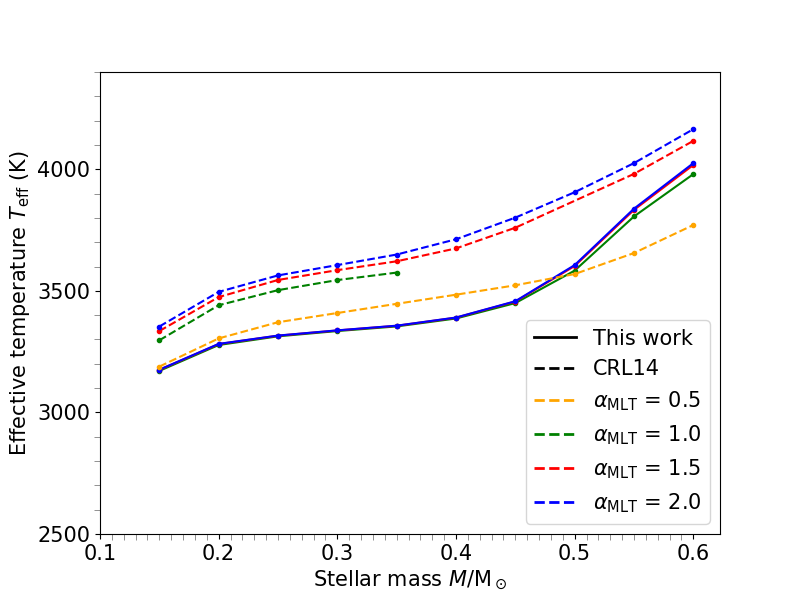

In [23]:
plt.figure(figsize=(8, 6))
masses = [0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60]
masses_alpha1p0 = [0.15, 0.20, 0.25, 0.30, 0.35]
masses_alpha1p5 = [0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.55, 0.60]

plt.plot(masses, my_teff_at_target_age_alpha1_z00142, color='green', marker='.', linestyle='-')
plt.plot(masses, my_teff_at_target_age_alpha16_z00142, color='red', marker='.', linestyle='-')
plt.plot(masses, my_teff_at_target_age_alpha182_z00142, color='blue', marker='.', linestyle='-')

plt.plot(masses, teff_at_target_age_alpha0p5, color='orange', marker='.', ls='--')
plt.plot(masses_alpha1p0, teff_at_target_age_alpha1p0, color='green', marker='.', ls='--')
plt.plot(masses_alpha1p5, teff_at_target_age_alpha1p5, color='red', marker='.', ls='--')
plt.plot(masses, teff_at_target_age_alpha2p0, color='blue', marker='.', ls='--')


# Set axis labels
plt.xlabel(r'Stellar mass $M/$M$_\odot$', fontsize=15)
plt.ylabel(r'Effective temperature $T_{\text{eff}}$ (K)', fontsize=15)

plt.title(r'', fontsize=15)

# Retrieve current axis
ax = plt.gca()

# Set major and minor ticks
xmajor_ticks = np.arange(0.1, 0.65, 0.1)
xminor_ticks = np.arange(0.1, 0.6, 0.01)
ymajor_ticks = np.arange(2500, 4500, 500)
yminor_ticks = np.arange(2500, 4500, 100)

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

# Customize tick appearance
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', length=4, color='gray')

plt.xticks(fontsize=15) 
plt.yticks(fontsize=15) 

# Create a custom legend
legend_elements = [
    Line2D([0], [0], color='black', lw=2, linestyle='-', label=r'This work'),
    Line2D([0], [0], color='black', lw=2, linestyle='--', label=r'CRL14'),
    Line2D([0], [0], color='orange', lw=2, ls='--', label=r'$\alpha_\text{MLT}$ = 0.5'),
    Line2D([0], [0], color='green', lw=2, ls='--', label=r'$\alpha_\text{MLT}$ = 1.0'),
    Line2D([0], [0], color='red', lw=2, ls='--', label=r'$\alpha_\text{MLT}$ = 1.5'),
    Line2D([0], [0], color='blue', lw=2, ls='--', label=r'$\alpha_\text{MLT}$ = 2.0'),
]
plt.legend(handles=legend_elements, fontsize=15, loc='lower right')

# Save figure
plt.savefig('isochrones-comparison-CRL2014.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()
